<a href="https://colab.research.google.com/github/vivekpatidar1413/ML_bootcamp_vivek/blob/Linear-Regression/FINAL_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the MNIST datasets


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

taking the mnist dataset in pandas dataframe

In [6]:
train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test_df  = pd.read_csv("/content/sample_data/mnist_test.csv")

In [30]:
# converting the panadas dataframe into numpy array

train = train_df.to_numpy()
test = test_df.to_numpy()

Splitting the dataset into 'labels' as 'y' and 'features' as 'x'

In [8]:
y_train = train[:,:1]
x_train = train[:,1:]

y_test = test[:,:1]
x_test = test[:,1:]

In [9]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(19999, 784) (19999, 1)
(9999, 784) (9999, 1)


checking the number of training examples for each lable of digit

In [31]:
for j in range(10):
  temp = 0
  for i in range(19999):
    if y_train[i] == j:
      temp = temp + 1
  print('the',j,'digit occures',temp,'times')


the 0 digit occures 1962 times
the 1 digit occures 2243 times
the 2 digit occures 1989 times
the 3 digit occures 2021 times
the 4 digit occures 1924 times
the 5 digit occures 1761 times
the 6 digit occures 2038 times
the 7 digit occures 2126 times
the 8 digit occures 1912 times
the 9 digit occures 2023 times


# Visualizing the dataset

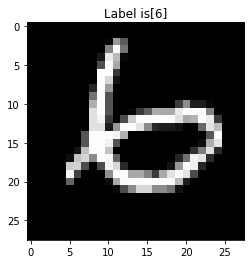

In [37]:
# Reshape the array into 28 x 28 array (2-dimensional array)
index =12
pixels = x_train[index].reshape((28, 28))

# Plot
plt.title('Label is'+str(y_train[index]))
plt.imshow(pixels, cmap='gray')
plt.show()

# Data Processing

In [47]:
# adding the '1' on the starting of each array rows

x_n_train = np.zeros((19999,785))

for i in range(19999):
    x_n_train[i] = np.insert(x_train[i],0,1)

x_n_train = x_n_train/255

In [48]:
print(x_n_train.shape)

(19999, 785)


# The Main Function

The Main Linear Regression Function Starts from here

In [49]:
''' the Q  here is parameter here (THEETA)'''

Q = np.random.randn(1,785)

In [50]:
# definging some useful values

itrations = 50000
alpha = 0.05
m =19999
cost_function = []

In [51]:
X = x_n_train.T
Y = y_train.T

In [52]:
for i in range(1,itrations+1):

  #PREDICTIONS
  hypothesis = np.dot(Q,X)  

  # COST FUNCTION                            
  j = 1/(2*m)*np.sum((hypothesis-Y)**2)
  cost_function.append(j)


  # GRADIENT DESCENT
  dw =  1/m * np.dot(hypothesis-Y,X.T)
  Q = Q - alpha*dw
      

  # printing the cost function which shows the degressing nature 
  if i%5000 == 0:
    print(i, 'th iteration, Cost Function =',j)


  # logic to break the loop if the change in cost is very very low 
  # ie. which sigifies that our parameters are rechead to give the minimum lavel of cost function

  if i%2 == 0:
      if abs(j-cost_function[-2])<0.000001:
        if abs(j-cost_function[-3])<0.000001:
          print('the last itration was ',i,'th','and the final cost function is ',j)
          break 

5000 th iteration, Cost Function = 1.907491359455398
10000 th iteration, Cost Function = 1.8530785689178375
15000 th iteration, Cost Function = 1.837599896804272
20000 th iteration, Cost Function = 1.8300714061720498
25000 th iteration, Cost Function = 1.8254547906233693
30000 th iteration, Cost Function = 1.8222644844360654
the last itration was  31454 th and the final cost function is  1.8215070244278082


In [53]:
# hypothesis = hypothesis.astype(int)
print(type(hypothesis),hypothesis.shape)
print(hypothesis)

<class 'numpy.ndarray'> (1, 19999)
[[5.29224837 2.39935706 8.25798228 ... 3.2150219  6.9363307  4.89634861]]


Graph between Cost function vs no. of iteration

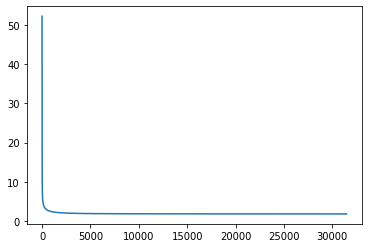

In [54]:
# this graph shows the decreasing nature of cost function

plt.plot(cost_function)
plt.show()

# Testing

In [55]:
y_pred = hypothesis.round()
y_n_pred = y_pred.astype(int)

for i in range(19999):
  if y_n_pred[0][i] < 0 :
    y_n_pred[0][i] = 0
  elif y_n_pred[0][i] >=10:
    y_n_pred[0][i] = 9

In [58]:
k = 0
for i in range(19999):
  # print(hypothesis[0][i],y_train[i])
  if y_pred[0][i] == y_train[i]:
    k = k+1
print(k,'is the number of corect prediction','the accurecy is ',k/199.99,'%')

4961 is the number of corect prediction the accurecy is  24.8062403120156 %


Testing on the defined testing labels

In [59]:
x_n_test = np.random.randn(9999,785)

for i in range(9999):
    x_n_test[i] = np.insert(x_train[i],0,1)

x_n_test = x_n_test/255

In [60]:
y_test_pred = np.dot(Q,x_n_test.T)

In [61]:
y_test_pred = y_test_pred.astype(int)

In [62]:
no_of_correct_predictions = 0
for i in range(9999):
  if y_test_pred[0][i] == y_test[i]:
    no_of_correct_predictions += 1

print(no_of_correct_predictions,'is the number of corect prediction','the accurecy is ',no_of_correct_predictions/99.99,'%')

932 is the number of corect prediction the accurecy is  9.320932093209322 %


# Accuracy Using Sklearn


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

reg = LinearRegression()
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

y_pred = y_pred.astype(int)

accuracy = accuracy_score(y_pred,y_test)

print('accuracy of the model using sklearn is',accuracy*100,'%')

accuracy of the model using sklearn is 25.16251625162516 %
